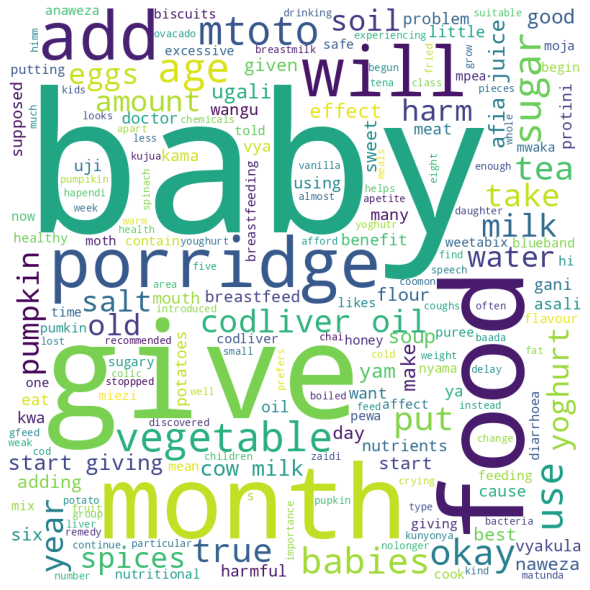

In [8]:
# Python program to generate WordCloud
import pickle
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Reads 'Youtube04-Eminem.csv' file
Nutrition=pd.read_excel('JH Technical Assignment Nutrition Questions.xlsx')
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in Nutrition['Sample Questions English']:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10, repeat=False).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [9]:
le = LabelEncoder()
y = le.fit_transform(Nutrition['Intent'])
cv = CountVectorizer()
X = cv.fit_transform(Nutrition['Sample Questions English'])
rf = RandomForestClassifier()
rf.fit(X,y)
pred = rf.predict(X)
accuracy_score(y, pred)
skf = KFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)
i=0
for train_index, test_index in skf.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier()
    rf.fit(X,y)
    pred = rf.predict(X)
    i=i+1
    print("The accuracy score of our text search model on fold {} is:".format(i), accuracy_score(y, pred))

KFold(n_splits=5, random_state=None, shuffle=False)
The accuracy score of our text search model on fold 1 is: 1.0
The accuracy score of our text search model on fold 2 is: 1.0
The accuracy score of our text search model on fold 3 is: 1.0
The accuracy score of our text search model on fold 4 is: 1.0
The accuracy score of our text search model on fold 5 is: 1.0


In [12]:
rf_pickle = open('random_forest.pickle', 'wb')
pickle.dump(rf, rf_pickle)
rf_pickle.close()

In [13]:
output, unique = pd.factorize(Nutrition['Intent'])
output_pickle = open('output.pickle', 'wb')
pickle.dump(unique, output_pickle)
output_pickle.close()

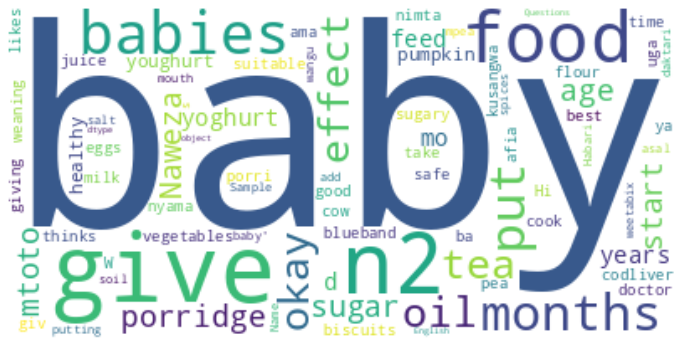

In [15]:
wc = WordCloud(background_color="white", max_words=150, max_font_size=256, 
            random_state=42)
wc.generate(str(Nutrition['Sample Questions English']))
plt.figure(figsize = (12,8))
# st.subheader("Most frequent words in the sample questions")
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [ ]:
while True:
    input_data = input("Enter a question to search its correct intent:    ")
    cv = CountVectorizer()
    cv.fit(Nutrition['Sample Questions English'])
    X = cv.transform(Nutrition['Sample Questions English'])
 
    input_data_vec = cv.transform([input_data])
    predictions = rf.predict(input_data_vec)
    le = LabelEncoder()
    le.fit(Nutrition['Intent'])
    y = le.transform(Nutrition['Intent'])
    predictions = le.inverse_transform(predictions)
    answer = predictions
    print("The correct intent to the question you have entered is: ",answer)